In [ ]:
#programa para determinar el punto inico en donde podremos empeasar a irradiar un tumor de cance 
# estudiando los pixeles de una imagen

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from random import random
import corner
%matplotlib inline
#######-----
import emcee
import corner
%pylab inline
########______
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from random import random
import corner
%matplotlib inline
#####--------
import pandas as pd
import searborn as sns
import pandas as read
import scipy.optimize as op
import matplotlib.pyplot as pl
########----
from PIL import Image

Populating the interactive namespace from numpy and matplotlib


C:\Users\Yuli\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [34]:
datos=pd.read_csv('data.txt')
x_dat,y_dat,err_dat=np.loadtxt('data.txt',unpack=True).T
plt.errorbar(x_dat, y_dat, err_dat, fmt='.')
m=len(datos)
print(m)

12547852189885


<ErrorbarContainer object of 3 artists>

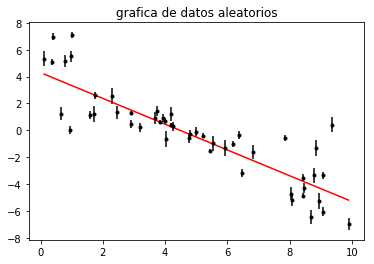

In [6]:
#A continuacion graficaremos los datos e una grafica
# Cambio de los verdaderos parametros
m_v = -0.9594
b_v = 4.294
f_v = 0.534
yerr = err_dat
y = m_v*datos+b_v  # nos dara la gra fica de los datos
title('grafica de datos aleatorios')
pl.plot(x, m_v*x+b_v, color="r") # distribucion de recta
pl.errorbar(x, y, yerr=yerr, fmt=".k")

In [58]:
n=int(m/10)
print('el numero de caminadores es',n)

el numero de caminadores es 1254785218988


In [54]:
# Ahora pasaremos a realizar las cadenas de MARCOV para los distintos caminadores

In [55]:
Datos = len(datos)    #  UTILIZADO PARA EL NUMERO DE DATOS
L=5                   #  NUMERO DE VARIABLES ALEATORIAS DE LA PENDIENTE,INTERCEPTP Y SIGMAS
C=int(m/10)          # NUMERO DE CAMINADORES
n=1
v=0
da=1000
pend=np.array([])
inter=np.array([])
chainB=np.array([])
chainM=np.array([])

In [ ]:
# Pero ocurre que nuesstro programa solo puede avanzar de 1000 en 1000 para no tener problemas con
#el conjunto de caminadores asi que
N=1000
while da < Datos+1000

la union de todos los caminadores que son= 12547852189885


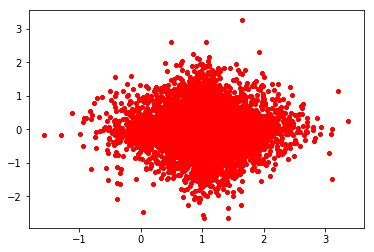

In [56]:
chainB=np.zeros((C*N*N+1,2))
chainM=np.zeros((C*N*N+1,2))
#print(chainB)
while n < C+1: 
  ########primer paso  
  m_ir=np.random.uniform(2,0.1,L)  # ESTE NOS DA L VALORES PARA m_ir 
  m_i =m_ir[2]  #PERO SOLO TOMAREMOS ELVALOR 2
  b_ir=np.random.uniform(2,0.1,L)
  b_i = b_ir[2]
  ############ resultados del primer paso  
  #######segundo paso
  #########paso sin resultados solo carga de datos 
  #######tercer paso 
   while v < Datos  #utilizado para llamar el conjunto de valores guaradados
      y[v] = m_i*datos[v]+b_i 
      v=v+1
      v=v  
  yerr = 0.1+0.5*np.random.rand(N)
  #y += np.abs(f_i*y) * np.random.randn(N)
  y += yerr * np.random.randn(N)
  ######## tercer paso sin resultados
  ##########cuarto paso
  def lnlike(theta, x, y, yerr):
      m, b, lnf = theta
      model = m * x + b
      inv_sigma2 = 1.0/(yerr**2 + model**2*np.exp(2*lnf))
      return -0.5*(np.sum((y-model)**2*inv_sigma2 - np.log(inv_sigma2)))
  ########paso sin resultados cuarto paso
  ######## Quinto paso
  plist = [0.0,5.0,0.0,5.0]
  ######Quinto paso sin rresutados
  #######SSexto paso
  def lnprior(theta, plist):
    m, b = theta
    if plist[0] < m < plist[1] and plist[2] < b < plist[3]:
        return 0.0
    return -np.inf
  ###########Cierre del Sexto Paso
  ##########Siptimo paso
  sigma_mr =np.random.uniform(0.8,0.01,L) 
  sigma_m = sigma_mr[2]
  sigma_br = np.random.uniform(0.9,0.05,L)#sigma_b = 0.05
  sigma_b =sigma_br[2] 
  #########Cierre del Septimo paso
  ######### Octavo Paso
  m_new = np.random.uniform(m_i,sigma_m,1000)
  
  ########Cierre del Octavo Paso
  ########----Noveno Paso
  b_new = np.random.uniform(b_i,sigma_b,1000)
  #plt.plot(b_new,'black')
  #plt.show()
  ########-----Cierre del Noveno Paso
  ########-----Desimo Paso
  def Pasos(theta_i,theta_p):
      if (lnprior(theta_p,theta_p)):
          return theta_i    
      p_i=lnlike(theta_i)
      p_p=lnlike(theta_p)
      p_n=p_p/p_i
      p_n=min(1.,p_n)
      if (p_n==1.):
          return theta_p
      else:
          x=random()
          if (p_n>=x):
              return theta_p
          else:
              return theta_i
      return  
  ########-----Cierre del Desimo Paso 
  ########------Onceavo Paso
  NS = N
  Nc = 10
  theta_in = [1.,0.0]
  c = []
  ########-----Cierre del Onceavo Paso
  ########------Doceavo Paso
  for i in range(N):
      theta_i = np.array([np.random.normal(theta_in[0],sigma_m),np.random.normal(theta_in[1], sigma_b)],)
      for l in range(NS):
          if l==0:
              cadena = theta_i
          else:
              theta_p = np.array([np.random.normal(theta_in[0], sigma_m),np.random.normal(theta_in[1], sigma_b)])
              theta_n = Pasos(theta_i,theta_p)
              cadena = np.concatenate((cadena,theta_n))
              theta_i = theta_n
      if i==0:
          c = cadena
      else:
          c = np.vstack((c,cadena))
  ########-----Cierre del Doceavo Paso 
  ########------Trececeavo Paso
  chain = c[:,:].reshape((-1, 2))
    
  ########-----Cierre del Trececeavo Paso
    
  for j in range(len(chain[:,0])):
      chainB[nu,0]=chain[j,0]
      chainM[nu,1]=chain[j,1]
      #print(nu,chainB[nu,0],chainM[nu,1])
      nu=nu+1 
      nu=nu
            
  ########-----Cierre del -Catorceavo Paso
        
  ############# cierre del while numero de caminadores  
  n+=1
print('la union de todos los caminadores que son=',C)      
plt.scatter(chainB[:,0],chainM[:,1],s=None, marker='.',color='red')
plt.show()


In [ ]:
da=da+1000
da=da

In [27]:
### ahora haciendo la misma tecnica pero para graficar las diferentes pendientes 


In [65]:
Datos = len(datos)   #  UTILIZADO PARA EL NUMERO DE DATOS
L=5     #  NUMERO DE VARIABLES ALEATORIAS DE LA PENDIENTE,INTERCEPTP Y SIGMAS
C=int(m/10)       # NUMERO DE CAMINADORES
n=1
v=0
da=1000
pend=np.array([])
inter=np.array([])
chainB=np.array([])
chainM=np.array([])

In [66]:
# Pero ocurre que nuesstro programa solo puede avanzar de 1000 en 1000 para no tener problemas con
#el conjunto de caminadores asi que
N=1000
while da < Datos+1

la union de todos los caminadores que son= 12547852189885


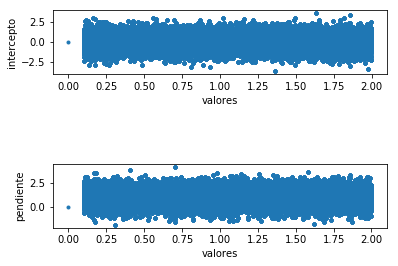

In [67]:
pend=np.zeros((C*N*N+1,2))
inter=np.zeros((C*N*N+1,2))
chainB=np.zeros((C*N*N+1,2))
chainM=np.zeros((C*N*N+1,2))

#print(chainB)
while n < C+1: 
  ########primer paso  
  m_ir=np.random.uniform(2,0.1,L)  # ESTE NOS DA L VALORES PARA m_ir 
  m_i =m_ir[2]  #PERO SOLO TOMAREMOS ELVALOR 2
  b_ir=np.random.uniform(2,0.1,L)
  b_i = b_ir[2]
  ############ resultados del primer paso  
  #######segundo paso
   #########paso sin resultados solo carga de datos 
  #######tercer paso 
  while v < Datos     #utilizado para llamar el conjunto de valores guaradados
      y[v] = m_i*datos[v]+b_i 
      v=v+1
      v=v 
  yerr = 0.1+0.5*np.random.rand(N)
  #y += np.abs(f_i*y) * np.random.randn(N)
  y += yerr * np.random.randn(N)
  ######## tercer paso sin resultados
  ##########cuarto paso
  def lnlike(theta, x, y, yerr):
      m, b, lnf = theta
      model = m * x + b
      inv_sigma2 = 1.0/(yerr**2 + model**2*np.exp(2*lnf))
      return -0.5*(np.sum((y-model)**2*inv_sigma2 - np.log(inv_sigma2)))
  ########paso sin resultados cuarto paso
  ######## Quinto paso
  plist = [0.0,5.0,0.0,5.0]
  ######Quinto paso sin rresutados
  #######SSexto paso
  def lnprior(theta, plist):
    m, b = theta
    if plist[0] < m < plist[1] and plist[2] < b < plist[3]:
        return 0.0
    return -np.inf
  ###########Cierre del Sexto Paso
  ##########Siptimo paso
  sigma_mr =np.random.uniform(0.8,0.01,L) 
  sigma_m = sigma_mr[2]
  sigma_br = np.random.uniform(0.9,0.05,L)#sigma_b = 0.05
  sigma_b =sigma_br[2] 
 
  #########Cierre del Septimo paso
  ######### Octavo Paso
  m_new = np.random.uniform(m_i,sigma_m,1000)
  #plt.plot(m_new,'black')
  ########Cierre del Octavo Paso
  ########----Noveno Paso
  b_new = np.random.uniform(b_i,sigma_b,1000)
  #plt.plot(b_new,'black')
  #plt.show()
  ########-----Cierre del Noveno Paso
  ########-----Desimo Paso
  def Pasos(theta_i,theta_p):
      if (lnprior(theta_p,theta_p)):
          return theta_i    
      p_i=lnlike(theta_i)
      p_p=lnlike(theta_p)
      p_n=p_p/p_i
      p_n=min(1.,p_n)
      if (p_n==1.):
          return theta_p
      else:
          x=random()
          if (p_n>=x):
              return theta_p
          else:
              return theta_i
      return  
  ########-----Cierre del Desimo Paso 
  ########------Onceavo Paso
  NS = N
  Nc = 10
  theta_in = [1.,0.0]
  c = []
  ########-----Cierre del Onceavo Paso
  ########------Doceavo Paso
  for i in range(N):
      theta_i = np.array([np.random.normal(theta_in[0],sigma_m),np.random.normal(theta_in[1], sigma_b)],)
      for l in range(NS):
          if l==0:
              cadena = theta_i
          else:
              theta_p = np.array([np.random.normal(theta_in[0], sigma_m),np.random.normal(theta_in[1], sigma_b)])
              theta_n = Pasos(theta_i,theta_p)
              cadena = np.concatenate((cadena,theta_n))
              theta_i = theta_n
      if i==0:
          c = cadena
      else:
          c = np.vstack((c,cadena))
  ########-----Cierre del Doceavo Paso 
  ########------Trececeavo Paso
  chain = c[:,:].reshape((-1, 2))
 
  
  ########-----Cierre del Trececeavo Paso
    
  for j in range(len(chain[:,0])):
      chainB[nu,0]=chain[j,0]
      chainM[nu,1]=chain[j,1]  # Este es la acumulacion de cademas mas importante para el uso de todos los dados 
                                # por esta en funcion de nu y no de otra variable
      pend[nu,0]=m_i
      inter[nu,1]=b_i
      #print(nu,chainB[nu,0],chainM[nu,1])
      nu=nu+1 
      nu=nu
      
   n+=1
print('la union de todos los caminadores que son=',C)      

plt.subplot(3,1,1)
plt.scatter(inter[:,1],chainM[:,1],s=None, marker='.')
plt.ylabel('intercepto')
plt.xlabel('valores')

plt.subplot(3,1,3)
plt.scatter(pend[:,0],chainB[:,0],s=None, marker='.')
plt.ylabel('pendiente')
plt.xlabel('valores')
plt.show()

#print('TOTALES',chainB[:,0],chainM[:,1])

In [ ]:
da=da+1000
da=da

In [15]:
samples = sampler.chainM[:, 50:, :].reshape((-1, ndim))
samples = sampler.chainB[:, 50:, :].reshape((-1, ndim))

Text(0.5,1,'        ______________________POSICIONES CENTRALES DEL CONJUNTO DE DATOS')

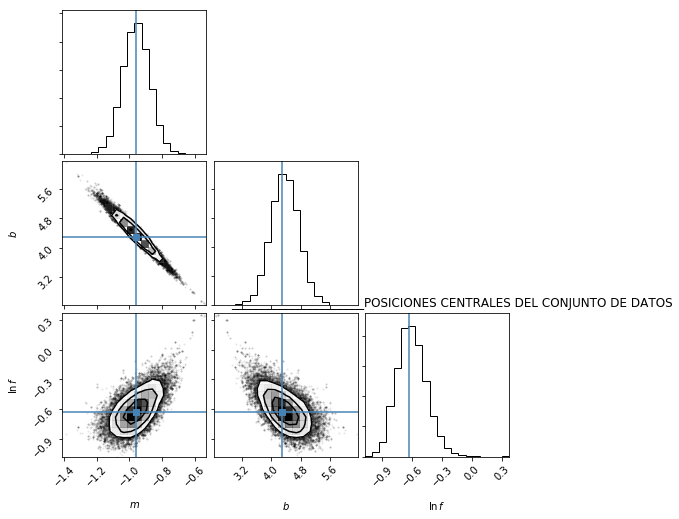

In [23]:
import corner
fig = corner.corner(samples, labels=["$m$", "$b$", "$\ln\,f$"], truths=[m_new, b_new, np.nlf])
fig.savefig("triangle.png") # observaciones de las graficas tanto de barras como de acumulacion de puntos
plt.title('        ______________________POSICIONES CENTRALES DEL CONJUNTO DE DATOS')

In [ ]:
#Observando los valores centrales n la grafica anterior podemos determinara la tendencia visual verdadera

<ErrorbarContainer object of 3 artists>

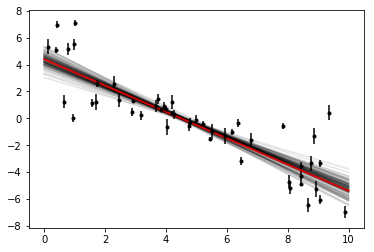

In [25]:

m_true=-0.98
b_true=4.4
xl[:] = np.datos([:])
for m, b, lnf in samples[np.random.randint(len(samples))]:
    pl.plot(xl, m*xl[:]+b, color="k")
pl.plot(xl, m_true*xl[:]+b_true, color="r")
pl.errorbar(x, y, yerr=yerr, fmt=".k")